In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd 
from keras.layers import Input, Dense
from tensorflow.keras.models import Model


In [2]:
path = './smoke_detection_iot.csv'

df = pd.read_csv(path)
X = df.iloc[:,2:-1].values
y = df.iloc[:,-1].values


In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(X)

In [4]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [5]:
def smokeDetectionModel():
    x = Input(shape=(np.transpose(train_x).shape[0],))
    y = Dense(16, activation='relu')(x)

    outputs = Dense(1, activation='sigmoid')(y)

    model = Model(inputs=x, outputs=outputs)

    return model

print(smokeDetectionModel().summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 16)                224       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________
None


2022-09-12 21:41:58.862570: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# compile and fit the model 

model = smokeDetectionModel()

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss = 'binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(
    train_x,train_y, epochs=5,verbose=1,
    validation_data=(test_x,test_y))


Epoch 1/5
1566/1566 [==============================] - 3s 1ms/step - loss: 0.1723 - accuracy: 0.9501 - val_loss: 0.0453 - val_accuracy: 0.9949
Epoch 2/5
1566/1566 [==============================] - 2s 2ms/step - loss: 0.0309 - accuracy: 0.9966 - val_loss: 0.0207 - val_accuracy: 0.9981
Epoch 3/5
1566/1566 [==============================] - 2s 2ms/step - loss: 0.0175 - accuracy: 0.9987 - val_loss: 0.0126 - val_accuracy: 0.9995
Epoch 4/5
1566/1566 [==============================] - 3s 2ms/step - loss: 0.0118 - accuracy: 0.9993 - val_loss: 0.0085 - val_accuracy: 0.9999
Epoch 5/5
1566/1566 [==============================] - 3s 2ms/step - loss: 0.0086 - accuracy: 0.9997 - val_loss: 0.0059 - val_accuracy: 0.9999


In [7]:
# print the accuracy and save the model
score = model.evaluate(test_x,test_y,verbose=1)
print("Test accuracy: %.1f%%" % (100.0 * score[1]))
model.save('smokedetection.h5')

392/392 [==============================] - 0s 1ms/step - loss: 0.0059 - accuracy: 0.9999
Test accuracy: 100.0%


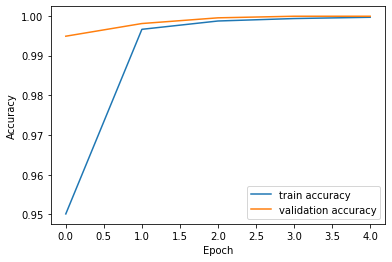

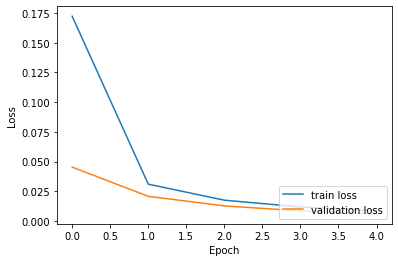

In [8]:
# Visualize Loss and Accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()


###### 